In [1]:
from pennylane import numpy as np
import pennylane as qml
from matplotlib import pyplot as plt

In [2]:
I = np.eye(2)
X = np.array([[0, 1], [1, 0]])
Z = np.array([[1, 0], [0, -1]])
Y = np.array([[0,-1j],[1j, 0]])

In [3]:
'''
T1 = single-qubit (energy) relaxation time and 
T2 = dephasing time
'''

'\nT1 = single-qubit (energy) relaxation time and \nT2 = dephasing time\n'

In [169]:
t=np.linspace(1,200,200)*10**(-9)
T1=400*10**(-9)
T2=200*10**(-9)
steps=1

In [170]:
#P_AD=0
#P_PD=0
def P(t,T1,T2):
    
    P_AD=1-np.exp(-t/T1)
    P_PD=1-np.exp(-t*2/T2)*np.exp(t/T1)
    
    return P_AD,P_PD

In [171]:
P(t,T1,T2)

(tensor([0.00249688, 0.00498752, 0.00747195, 0.00995017, 0.0124222 ,
         0.01488806, 0.01734776, 0.01980133, 0.02224876, 0.02469009,
         0.02712532, 0.02955447, 0.03197755, 0.03439458, 0.03680558,
         0.03921056, 0.04160953, 0.04400252, 0.04638953, 0.04877058,
         0.05114568, 0.05351485, 0.05587811, 0.05823547, 0.06058694,
         0.06293254, 0.06527228, 0.06760618, 0.06993425, 0.07225651,
         0.07457298, 0.07688365, 0.07918856, 0.08148772, 0.08378113,
         0.08606881, 0.08835079, 0.09062707, 0.09289766, 0.09516258,
         0.09742185, 0.09967548, 0.10192348, 0.10416586, 0.10640265,
         0.10863386, 0.11085949, 0.11307956, 0.1152941 , 0.1175031 ,
         0.11970658, 0.12190457, 0.12409707, 0.12628409, 0.12846565,
         0.13064176, 0.13281245, 0.13497771, 0.13713756, 0.13929202,
         0.14144111, 0.14358482, 0.14572319, 0.14785621, 0.14998391,
         0.1521063 , 0.15422338, 0.15633518, 0.15844171, 0.16054298,
         0.162639  , 0.16472979, 0

In [172]:
def ED(t,T1,T2):
    P_AD,P_PD=P(t,T1,T2)
    gamma=P_AD
    Lambda=(1-P_AD)*P_PD
    
    ED1=(1+np.sqrt(1-gamma-Lambda))/2*I+(1-np.sqrt(1-gamma-Lambda))/2*Z
    ED2=np.sqrt(gamma)/2*X+1j*np.sqrt(gamma)/2*Y
    ED3=np.sqrt(Lambda)/2*I-np.sqrt(Lambda)/2*Z
    
    return ED1,ED2,ED3

In [173]:
a,b,c=ED(0.1,0.008,0.005)
c

tensor([[0.        , 0.        ],
        [0.        , 0.00193045]], requires_grad=True)

In [174]:
dev=qml.device("default.mixed",wires=1)

In [175]:
@qml.qnode(dev)
def density_matrix(step):
    if step==0:
        #qml.Hadamard(wires=0)
        return qml.state()
    
    if step==1:
        #density_matrix(0)
        qml.Hadamard(wires=0)
        #qml.Hadamard(wires=0)
        return qml.state()
 

In [176]:
def Decoherent_state( t,  T1,  T2,  steps):
    
    rho=density_matrix(steps)
    
    ED1,ED2,ED3=ED(t,T1,T2)
    
    epsilon_D_rho_1=np.dot(np.dot(ED1,rho),np.transpose(np.conj(ED1)))+\
                    np.dot(np.dot(ED2,rho),np.transpose(np.conj(ED2)))+\
                    np.dot(np.dot(ED3,rho),np.transpose(np.conj(ED3)))
    
    return epsilon_D_rho_1

In [177]:
ρ_noise=[]
ρ_noise=[Decoherent_state(time,T1,T2,steps) for time in t] 
(ρ_noise)

[tensor([[0.50124844+0.j, 0.49750624+0.j],
         [0.49750624+0.j, 0.49875156+0.j]], requires_grad=True),
 tensor([[0.50249376+0.j, 0.49502492+0.j],
         [0.49502492+0.j, 0.49750624+0.j]], requires_grad=True),
 tensor([[0.50373597+0.j, 0.49255597+0.j],
         [0.49255597+0.j, 0.49626403+0.j]], requires_grad=True),
 tensor([[0.50497508+0.j, 0.49009934+0.j],
         [0.49009934+0.j, 0.49502492+0.j]], requires_grad=True),
 tensor([[0.5062111 +0.j, 0.48765496+0.j],
         [0.48765496+0.j, 0.4937889 +0.j]], requires_grad=True),
 tensor([[0.50744403+0.j, 0.48522277+0.j],
         [0.48522277+0.j, 0.49255597+0.j]], requires_grad=True),
 tensor([[0.50867388+0.j, 0.48280271+0.j],
         [0.48280271+0.j, 0.49132612+0.j]], requires_grad=True),
 tensor([[0.50990066+0.j, 0.48039472+0.j],
         [0.48039472+0.j, 0.49009934+0.j]], requires_grad=True),
 tensor([[0.51112438+0.j, 0.47799874+0.j],
         [0.47799874+0.j, 0.48887562+0.j]], requires_grad=True),
 tensor([[0.51234504+0.j, 0.

In [178]:
def Decoherent_state_2( t,  T1,  T2, Density_matrix):
    
    H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
    
    rho=Density_matrix
    rho=np.dot(np.dot(H,rho),np.transpose(np.conj(H)))
    
    ED1,ED2,ED3=ED(t,T1,T2)
    
    epsilon_D_rho_1=np.dot(np.dot(ED1,rho),np.transpose(np.conj(ED1)))+\
                    np.dot(np.dot(ED2,rho),np.transpose(np.conj(ED2)))+\
                    np.dot(np.dot(ED3,rho),np.transpose(np.conj(ED3)))
    
    return epsilon_D_rho_1

In [179]:
ρ_noise_2=[]
ρ_noise_2=[Decoherent_state_2(time,T1,T2,matrix) for time,matrix in zip(t,ρ_noise)]
len(ρ_noise_2)

200

In [180]:
# Function to find the fidelity between two density matrix
def Fidelity(rho1,rho2):
    if rho1.shape!=rho2.shape:
        raise ValueError("Dimension of both matrices must be same")
    return ((np.trace(np.dot(np.transpose(np.conj(rho1)),rho2))))  # as one of them is pure (entangled) state

In [183]:
rho2=density_matrix(0)  # this is the pure density matrix 
F=[]
for rho1 in ρ_noise_2:
    F.append(Fidelity(rho1,rho2))
    
F

[(0.9975124662108388+0j),
 (0.9950497302051896+0j),
 (0.9926115911870986+0j),
 (0.9901978498996696+0j),
 (0.9878083086134696+0j),
 (0.9854427711150183+0j),
 (0.9831010426953636+0j),
 (0.9807829301387463+0j),
 (0.9784882417113453+0j),
 (0.9762167871501096+0j),
 (0.973968377651675+0j),
 (0.9717428258613597+0j),
 (0.9695399458622473+0j),
 (0.9673595531643492+0j),
 (0.9652014646938465+0j),
 (0.9630654987824167+0j),
 (0.9609514751566366+0j),
 (0.958859214927467+0j),
 (0.9567885405798139+0j),
 (0.9547392759621718+0j),
 (0.9527112462763387+0j),
 (0.9507042780672156+0j),
 (0.9487181992126751+0j),
 (0.9467528389135113+0j),
 (0.9448080276834617+0j),
 (0.9428835973393072+0j),
 (0.9409793809910414+0j),
 (0.939095213032119+0j),
 (0.9372309291297742+0j),
 (0.9353863662154116+0j),
 (0.9335613624750703+0j),
 (0.9317557573399584+0j),
 (0.9299693914770604+0j),
 (0.9282021067798115+0j),
 (0.9264537463588463+0j),
 (0.9247241545328122+0j),
 (0.9230131768192559+0j),
 (0.9213206599255751+0j),
 (0.91964645174

In [ ]:
#rho1=ρ_noise_2  # this is the mixed/noisy density matrix
#rho2=density_matrix(0)  # this is the pure density matrix 
#print("Fidelity between the actual Fredkin and the optimized Fredkin :-",Fidelity(rho2,(rho1)))

C:\Users\Arunava\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


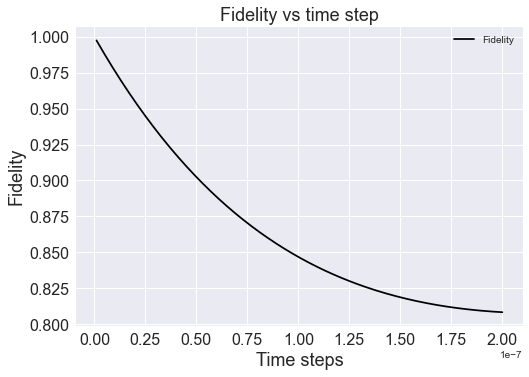

In [182]:
plt.style.use("seaborn")
plt.plot(t,F,"black",label="Fidelity")
plt.ylabel("Fidelity", fontsize=18)
plt.xlabel("Time steps", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)   # helps to increase the size of the values in X and Y axis
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.title("Fidelity vs time step", fontsize=18)
plt.legend()
plt.show()